In [1]:
from tucan.canonicalization import (partition_molecule_by_attribute,
                                    refine_partitions,
                                    assign_canonical_labels,
                                    serialize_molecule,
                                    _sort_molecule_by_attribute)
from tucan.io import graph_from_file, permute_molecule
from tucan.visualization import draw_molecules
from pathlib import Path
import networkx as nx
from tabulate import tabulate
import matplotlib.pyplot as plt
from PIL import Image

DPI = 400
ANNOTATION_XY = (.05, .95)

def print_invariant_codes(m):
    table = []
    for atom in sorted(m.nodes()):
        invariant_code = m.nodes[atom]["invariant_code"]
        partition = m.nodes[atom]["partition"]
        extended_invariant_code = " / ".join(
            [invariant_code] +
            sorted(
                [m.nodes[n]["invariant_code"] for n in m.neighbors(atom)],
                reverse=True
                )
            )
        table.append([atom, partition, extended_invariant_code])
    print(
        tabulate(
            table,
            tablefmt="github",
            colalign=["left"] * 3,
            headers=[
                "label",
                "partition",
                "invariant-code",
            ],
        )
    )
    
    
def print_partitions(m):
    table = []
    for atom in sorted(m.nodes()):
        partition = m.nodes[atom]["partition"]
        neighbor_partitions = " / ".join(
            sorted(
                [str(m.nodes[n]["partition"]) for n in m.neighbors(atom)],
                reverse=True
                )
            )
        table.append([atom, partition, neighbor_partitions])
    print(
        tabulate(
            table,
            tablefmt="github",
            colalign=["left"] * 3,
            headers=[
                "label",
                "partition",
                "neighbor partitions",
            ],
        )
    )

| label   | partition   | invariant-code    |
|---------|-------------|-------------------|
| 0       | 0           | 1 / 6             |
| 1       | 0           | 1 / 6             |
| 2       | 0           | 1 / 6             |
| 3       | 0           | 1 / 6             |
| 4       | 0           | 1 / 6             |
| 5       | 0           | 1 / 6             |
| 6       | 0           | 1 / 6             |
| 7       | 0           | 1 / 6             |
| 8       | 0           | 1 / 6             |
| 9       | 0           | 1 / 6             |
| 10      | 0           | 6 / 6 / 6 / 1 / 1 |
| 11      | 0           | 6 / 6 / 6 / 1 / 1 |
| 12      | 0           | 6 / 6 / 6 / 1 / 1 |
| 13      | 0           | 6 / 6 / 6 / 1 / 1 |
| 14      | 0           | 6 / 6 / 6 / 1 / 1 |
| 15      | 0           | 6 / 6 / 6 / 6     |
| 16      | 0           | 6 / 6 / 6 / 6     |
| 17      | 0           | 6 / 8 / 6 / 6     |
| 18      | 0           | 8 / 6             |


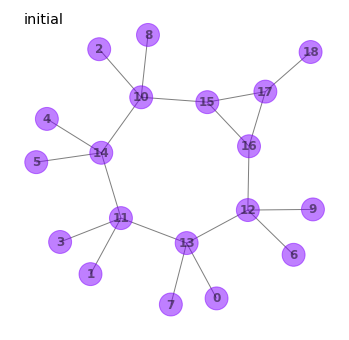

In [2]:
molecule = "Bicyclo[5.1.0]octa-1(7)-ene-8-one"
m = permute_molecule(graph_from_file(Path(f"../tests/molfiles/{molecule}/{molecule}.mol")), random_seed=.41)
m = _sort_molecule_by_attribute(m, "invariant_code")
print_invariant_codes(m)
draw_molecules([m], [""], highlight="partition")
plt.savefig("initial.svg", transparent=True, bbox_inches="tight")
plt.annotate("initial", xy=ANNOTATION_XY, xycoords="axes fraction", fontsize="x-large")
plt.savefig("initial_annotated.png", transparent=True, bbox_inches="tight", dpi=DPI)

| label   | partition   | invariant-code    |
|---------|-------------|-------------------|
| 0       | 0           | 1 / 6             |
| 1       | 0           | 1 / 6             |
| 2       | 0           | 1 / 6             |
| 3       | 0           | 1 / 6             |
| 4       | 0           | 1 / 6             |
| 5       | 0           | 1 / 6             |
| 6       | 0           | 1 / 6             |
| 7       | 0           | 1 / 6             |
| 8       | 0           | 1 / 6             |
| 9       | 0           | 1 / 6             |
| 10      | 1           | 6 / 6 / 6 / 1 / 1 |
| 11      | 1           | 6 / 6 / 6 / 1 / 1 |
| 12      | 1           | 6 / 6 / 6 / 1 / 1 |
| 13      | 1           | 6 / 6 / 6 / 1 / 1 |
| 14      | 1           | 6 / 6 / 6 / 1 / 1 |
| 15      | 2           | 6 / 6 / 6 / 6     |
| 16      | 2           | 6 / 6 / 6 / 6     |
| 17      | 3           | 6 / 8 / 6 / 6     |
| 18      | 4           | 8 / 6             |


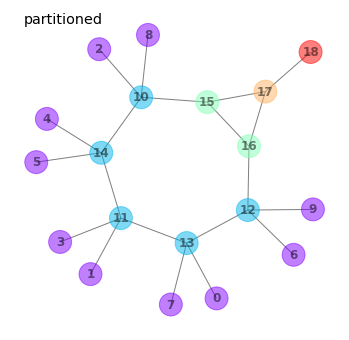

In [3]:
m_partitioned_by_invariants = partition_molecule_by_attribute(m, "invariant_code")
print_invariant_codes(m_partitioned_by_invariants)
draw_molecules([m_partitioned_by_invariants], [""], highlight="partition")
plt.savefig("partitioned.svg", transparent=True, bbox_inches="tight")
plt.annotate("partitioned", xy=ANNOTATION_XY, xycoords="axes fraction", fontsize="x-large")
plt.savefig("partitioned_annotated.png", transparent=True, bbox_inches="tight", dpi=DPI)

| label   | partition   | neighbor partitions   |
|---------|-------------|-----------------------|
| 0       | 0           | 1                     |
| 1       | 0           | 1                     |
| 2       | 0           | 1                     |
| 3       | 0           | 1                     |
| 4       | 0           | 1                     |
| 5       | 0           | 1                     |
| 6       | 0           | 1                     |
| 7       | 0           | 1                     |
| 8       | 0           | 1                     |
| 9       | 0           | 1                     |
| 10      | 1           | 2 / 1 / 0 / 0         |
| 11      | 1           | 1 / 1 / 0 / 0         |
| 12      | 1           | 2 / 1 / 0 / 0         |
| 13      | 1           | 1 / 1 / 0 / 0         |
| 14      | 1           | 1 / 1 / 0 / 0         |
| 15      | 2           | 3 / 2 / 1             |
| 16      | 2           | 3 / 2 / 1             |
| 17      | 3           | 4 / 2 / 2             |


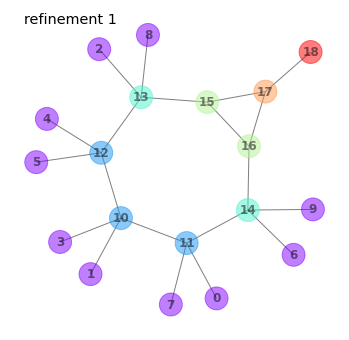

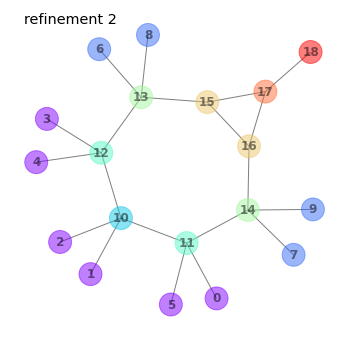

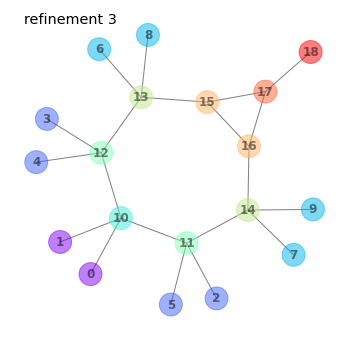

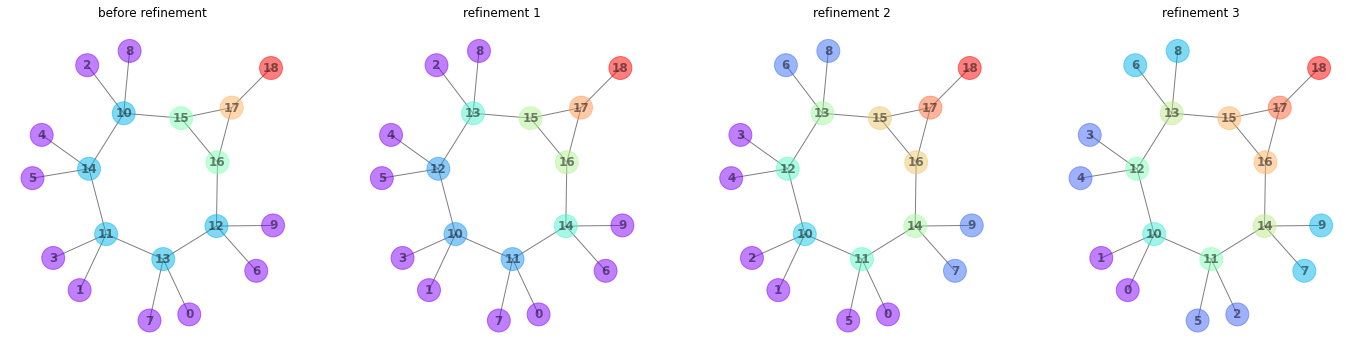

In [4]:
print_partitions(m_partitioned_by_invariants)
refinements = list(refine_partitions(m_partitioned_by_invariants))
for i, m_refined in enumerate(refinements):
    draw_molecules([m_refined], [""], highlight="partition")
    plt.savefig(f"refined_{i + 1}.svg", transparent=True, bbox_inches="tight")
    plt.annotate(f"refinement {i + 1}", xy=ANNOTATION_XY, xycoords="axes fraction", fontsize="x-large")
    plt.savefig(f"refined_{i + 1}_annotated.png", transparent=True, bbox_inches="tight", dpi=DPI)
    print_partitions(m_refined)
draw_molecules([m_partitioned_by_invariants] + refinements,
               ["before refinement"] + [f"refinement {i + 1}" for i in range(len(refinements))],
               highlight="partition")
plt.savefig("refined_summary.svg", transparent=True, bbox_inches="tight")

Current atom index: 0.	Re-labeling to 0.
Current atom index: 10.	Re-labeling to 10.
Current atom index: 1.	Re-labeling to 1.
Current atom index: 11.	Re-labeling to 11.
Current atom index: 12.	Re-labeling to 12.
Current atom index: 2.	Re-labeling to 2.
Current atom index: 5.	Re-labeling to 3.
Current atom index: 14.	Re-labeling to 13.
Current atom index: 3.	Re-labeling to 4.
Current atom index: 4.	Re-labeling to 5.
Current atom index: 13.	Re-labeling to 14.
Current atom index: 7.	Re-labeling to 6.
Current atom index: 9.	Re-labeling to 7.
Current atom index: 16.	Re-labeling to 15.
Current atom index: 6.	Re-labeling to 8.
Current atom index: 8.	Re-labeling to 9.
Current atom index: 15.	Re-labeling to 16.
Current atom index: 17.	Re-labeling to 17.
Current atom index: 18.	Re-labeling to 18.


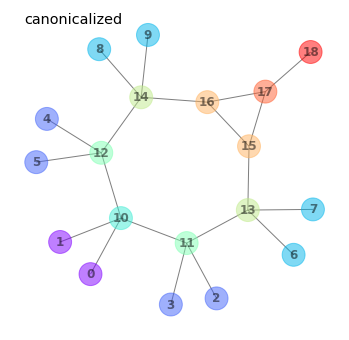

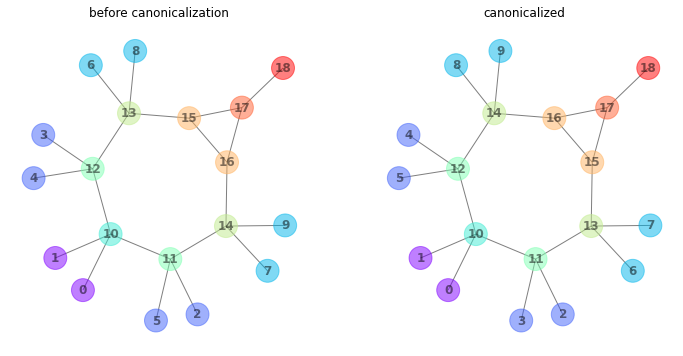

In [5]:
canonical_idcs = assign_canonical_labels(m_refined, 0, show_traversal_order=True)
m_canonicalized = nx.relabel_nodes(m_refined, canonical_idcs, copy=True)
draw_molecules([m_canonicalized], [""], highlight="partition")
plt.savefig("canonicalized.svg", transparent=True, bbox_inches="tight")
plt.annotate(f"canonicalized", xy=ANNOTATION_XY, xycoords="axes fraction", fontsize="x-large")
plt.savefig("canonicalized_annotated.png", transparent=True, bbox_inches="tight", dpi=DPI)
draw_molecules([m_refined, m_canonicalized], ["before canonicalization", "canonicalized"], highlight="partition")
plt.savefig("canonicalized_summary.svg", transparent=True, bbox_inches="tight")

In [6]:
print(serialize_molecule(m_canonicalized))

C8H10O/1-11/2-11/3-12/4-12/5-13/6-13/7-14/8-14/9-15/10-15/11-12/11-13/12-14/13-15/14-16/15-17/16-17/16-18/17-18/18-19


In [7]:
canonicalization_steps = ["initial", "partitioned", "refined_1", "refined_2", "refined_3", "canonicalized"]
gif = [Image.open(f"{step}_annotated.png") for step in canonicalization_steps]
gif[0].save("canonicalization_animation.gif", save_all=True,
            append_images=gif[1:], duration=2000, loop=0)
 